# 

In [1]:
from Scripts.Make_logistic import *


In [2]:
df = pd.read_excel('Data/Clinical_synthetic.xlsx', index_col=0)
X,y=df.drop(['asthma_0_7yrs',
       'verificeret_12y', 'verificeret_18y'],axis=1),df.verificeret_18y

In [4]:
performence,kernel,mcmc=nested_cross_baysian_logistic(X,y,2,3,"Models/asthma_adjusted_18_year_")

Sample: 100%|████████████████████████████████████████| 4500/4500 [02:22, 31.54it/s, step size=1.07e-01, acc. prob=0.945]
/data/michaelf/miniconda3/lib/python3.10/site-packages/arviz/data/io_pyro.py:158: UserWarning: Could not get vectorized trace, log_likelihood group will be omitted. Check your model vectorization or set log_likelihood=False
  warnings.warn(
posterior predictive shape not compatible with number of chains and draws.This can mean that some draws or even whole chains are not represented.
Sample: 100%|████████████████████████████████████████| 4500/4500 [02:13, 33.71it/s, step size=1.20e-01, acc. prob=0.930]
/data/michaelf/miniconda3/lib/python3.10/site-packages/arviz/data/io_pyro.py:158: UserWarning: Could not get vectorized trace, log_likelihood group will be omitted. Check your model vectorization or set log_likelihood=False
  warnings.warn(
posterior predictive shape not compatible with number of chains and draws.This can mean that some draws or even whole chains are n

In [6]:
performence.to_excel("Models/performence_18_adjusted.xlsx")
performence.mean(axis=0),performence.std(axis=0)

(roc_train    0.717804
 roc_test     0.590749
 f1_train     0.310350
 f1_test      0.306680
 dtype: float64,
 roc_train    0.025391
 roc_test     0.039538
 f1_train     0.056150
 f1_test      0.044081
 dtype: float64)

In [6]:
asthma_1_exposure=az.from_json("Models/asthma_adjusted_18_year_00.json")
asthma_2_exposure=az.from_json("Models/asthma_adjusted_18_year_01.json")
asthma_3_exposure=az.from_json("Models/asthma_adjusted_18_year_10.json")
asthma_4_exposure=az.from_json("Models/asthma_adjusted_18_year_11.json")
asthma_5_exposure=az.from_json("Models/asthma_adjusted_18_year_20.json")
asthma_6_exposure=az.from_json("Models/asthma_adjusted_18_year_21.json")
asthma=az.concat(asthma_1_exposure,asthma_2_exposure,asthma_3_exposure,asthma_4_exposure,asthma_5_exposure,asthma_6_exposure, dim="chain")

In [ ]:
asthma["posterior"]["weight"]=np.exp(asthma["posterior"]["weight"])
asthma.posterior = asthma.posterior.assign_coords(
    weight_dim_0=X.columns
)
asthma.to_netcdf("Models/asthma_adjusted_18y.nc")


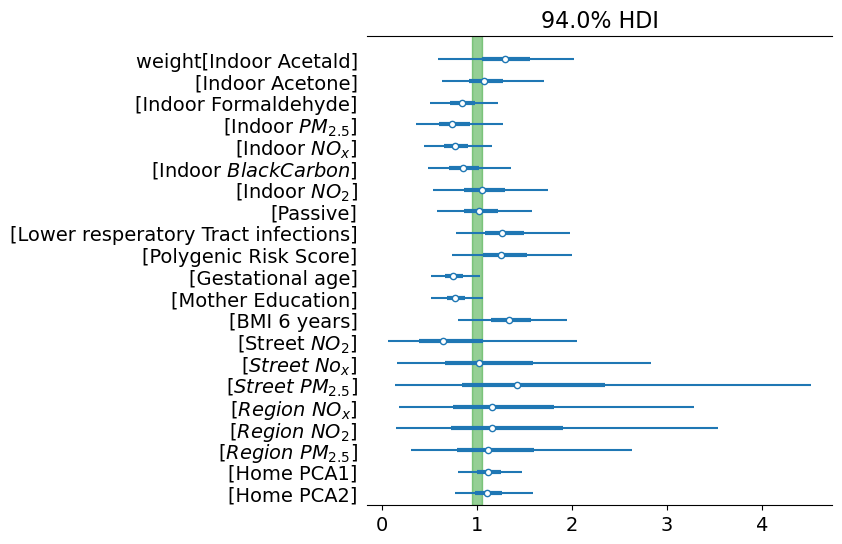

In [11]:
ax = az.plot_forest(
    [asthma], var_names="weight",rope=[0.95,1.05],combined=1)

In [20]:
az.rcParams["plot.max_subplots"] = 200


In [21]:
az.plot_pair(
    asthma, var_names=["weight"],divergences=True,marginals=True);